#Evaluación Final Módulo 4

#Ejercicios planteados

#Contexto

#1.- 
Cierta compañía aérea ha requerido de sus servicios profesionales para llevar a cabo un estudio relacionado con la cantidad de pasajeros que llegan al país en vuelos internacionales, dicho estudio tiene relación con la enfermedad de COVID-19. De acuerdo a la información que maneja la compañía, la cantidad de pasajeros que llegan en vuelos internacionales se comporta aproximadamente normal con una media de 120 pasajeros y una varianza de 25.

In [17]:
import numpy as np
from scipy.stats import norm

# media pasajeros por día
mu = 120
# varianza pasajeros
varianza = 25
# desviacion típica pasajeros
sigma = 5

#a. 
Asumiendo que cada día llegan a Santiago 16 vuelos internacionales, determine la probabilidad de que durante el año (52 semanas) la cantidad total de pasajeros sea de al menos de 699500.

In [18]:
# la metodología es buscar el numero de pasajeros por vuelo diario partiendo del total de pasajeros en 1 año 699500
vuelos_diarios = 16
semanas_anual = 52
dias_semana = 7
total_pasajeros_esperados_anual = 699500
# entonces dividimos 
# el total de pasajeros esperados (699500) por semanas dadas (52) por dias de la semana (7) y por la media de pasajeros diario (120)
total_pasajeros_diario_esperado_X = (total_pasajeros_esperados_anual / (semanas_anual * dias_semana)) / vuelos_diarios
print("Psajeros por vuelo diario esperado en base al total anual :", total_pasajeros_diario_esperado_X)

# normaliza pasajeros diarios esperados
Z = ( total_pasajeros_diario_esperado_X - mu ) / np.sqrt(varianza)
alpha = round(norm.cdf(Z),4)
print(f"\nLuego de tipificar la variable X y consultada la tabla distribucion standard N(1,0) se obtiene que Z={Z:.4f} ")
# se solicta que a lo menos, es decir, que sea mayor o igual a 699500 pasajeros, por lo que se debe considerar cola derecha
alpha = 1 - alpha
print(f"Por lo que la probabilidad de que el total de pasajeros durante 1 años sea mayor o igual a {total_pasajeros_esperados_anual_X} es del {alpha*100:.2f}%")

Psajeros por vuelo diario esperado en base al total anual : 120.10645604395604

Luego de tipificar la variable X y consultada la tabla distribucion standard N(1,0) se obtiene que Z=0.0213 
Por lo que la probabilidad de que el total de pasajeros durante 1 años sea mayor o igual a 699500 es del 49.15%


In [19]:
# alternativa de cálculo en base a 1 año, es decir, calcular la media y desviación anual para tipificar
vuelos_diarios = 16
semanas_anual = 52
dias_semana = 7
total_pasajeros_esperados_anual_X = 699500

total_vuelos_anual = vuelos_diarios * dias_semana* semanas_anual 
print("total vuelos anual: ",total_vuelos_anual)

# calculando desviacion típica anual
desviacion_tipica_anual_esperada = sigma *  total_vuelos_anual
print("desviación típica anual:",desviacion_tipica_anual_esperada)

# calculando media
mu_pasajeros_anual = mu * total_vuelos_anual
print("media pasajeros anual:", mu_pasajeros_anual)

# tipificando X en su valor anual
# el total de pasajeros esperados anual (699500) menos media anual (698880) todo dividivo por desviación anual (29120)
Z = ( total_pasajeros_esperados_anual_X - mu_pasajeros_anual ) / desviacion_tipica_anual_esperada

total vuelos anual:  5824
desviación típica anual: 29120
media pasajeros anual: 698880


In [20]:
# resultado tipificación, busca Z en tabla 
alpha = round(norm.cdf(Z),4)
print(f"Luego de tipificar la variable X y consultada la tabla distribucion standard N(1,0) se obtiene que Z={Z:.4f} ")
# se solicta que a lo menos, es decir, que sea mayor o igual a 699500 pasajeros, por lo que se debe considerar cola derecha
alpha = 1 - alpha
print(f"Por lo que la probabilidad de que el total de pasajeros durante 1 años sea mayor o igual a {total_pasajeros_esperados_anual_X} es del {alpha*100:.2f}%")

Luego de tipificar la variable X y consultada la tabla distribucion standard N(1,0) se obtiene que Z=0.0213 
Por lo que la probabilidad de que el total de pasajeros durante 1 años sea mayor o igual a 699500 es del 49.15%


#b. 
De acuerdo con registros históricos se sabe que aproximadamente un 7% de los pasajeros son niños. Considerando un potencial de 400 pasajeros que llegarían en los próximos días, determine la probabilidad que menos de un 5% sean niños.

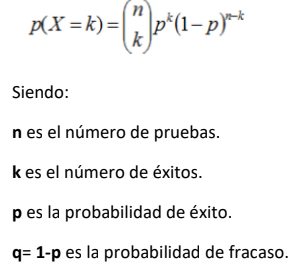
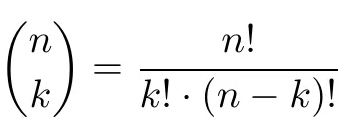

In [21]:
from scipy.special import binom

# datos aportados
porcentaje_ninos_historial= 0.07
porcentaje_ninos_esperada = 0.05
# muestra
muestra = 400
# número de pruebas
n = muestra 
print(f"n: {n:.0f}")
# número de exitos, número acumulado de niños igual al 5%
k = n * porcentaje_ninos_esperada
# se pide que menos del 5% por lo que se resta un niño a la cantidad de éxito
k = k - 1
print(f"k: {k:.0f}")
# probabioidad de éxito, que sea niño igual al 7%
p = porcentaje_ninos_historial
# probabilidad de fracaso, que no sean niños
q = 1 - p
print(f"p: {p:.2f}")
print(f"q: {q:.2f}")
# cálculo coef. binomial n!/k!*(n-k)!
cb=binom(n,k)
print(f"coef. binomial: {cb:.0f}")
#Reemplazando los valores en la fórmula:
prob = cb * (p ** k) * ((1-p) ** (n-k))
print(f"\nLa probabilidad de que al menos un 5% sean niños es de un {prob*100:.2f}%")

n: 400
k: 19
p: 0.07
q: 0.93
coef. binomial: 146370655310808207042151264026624

La probabilidad de que al menos un 5% sean niños es de un 1.64%


#2.- 
Una empresa que se dedica a hacer en cuestas se queja de que un agente realiza en promedio 53 encuestas por semana. Se ha introducido una forma más moderna de realizar las encuestas y la empresa quiere evaluar su efectividad. Los números de encuestas realizadas en una semana por una muestra aleatoria de agentes son:

# 53 57 50 55 58 54 60 52 59 62 60 60 51 59

En el nivel de significancia 0,05, puede concluirse que la cantidad media de entrevistas realizadas por los agentes es superior a 53 por semana? Evalúe el valor p.

In [22]:
def ttest_1samp(data, null_value, alternative):
  """
    Calculate the T-test for the mean of ONE group of scores
    input: sample observation, expected value in null hypothesis, defines the alternative hypothesis
    output: p-value, result of a t-test
  """
  from scipy import stats
  # one-sample t-test
  _, p_value = stats.ttest_1samp(
      data, null_value, alternative=alternative
  )
  return p_value

In [23]:
def check_hypothesis(p_value, alpha):
  result_text=[]
  print("Conclusión:")
  if p_value < alpha:
      result_text.append("Reject the null hypothesis")
      result_text.append('nula')
      result_text.append('menor')
      result_text.append('superior')
  else:
      result_text.append("Fail to reject the null hypothesis")
      result_text.append('alternativa')
      result_text.append('mayor')
      result_text.append('inferior')

  print(f"{result_text[0]}: Se rechaza hipótesis {result_text[1]} ya que p-value ({p_value:.4f}) es {result_text[2]} que el nivel")
  print(f"de significancia (alfa = {alpha}), por lo que se puede demostrar que que la cantidad media de entrevistas realizadas por")
  print(f"los agentes es {result_text[3]} por semana.")

In [24]:
# the null hypothesis value
null_value = 53
# amount of survey
n = 15
# data
survey = np.array( 
    [53, 57, 50, 55, 58, 54, 60, 52, 59, 62, 60, 60, 51, 59]
    )
alpha = 0.05
alternative_hypothesis = 'greater'
p_value = ttest_1samp(survey, null_value, alternative_hypothesis)
# Check if the p-value is less than the significance level
check_hypothesis(p_value, alpha)

Conclusión:
Reject the null hypothesis: Se rechaza hipótesis nula ya que p-value (0.0028) es menor que el nivel
de significancia (alfa = 0.05), por lo que se puede demostrar que que la cantidad media de entrevistas realizadas por
los agentes es superior por semana.


b) ¿Cuál es el valor p de la decisión?

In [25]:
# Print the computed p-value
print(f"El p-value de la decisión es: {p_value:.4f}")

El p-value de la decisión es: 0.0028
